# Classifying Tweet Emotions

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# Import NLP modules
import fasttext
# from textblob import TextBlob
# from langdetect import detect

pd.set_option('display.max_colwidth', 160)

## Data Preparation

In [2]:
# Read data
df = pd.read_csv('data/text_emotion.csv', usecols=list(range(1,4)))

In [3]:
# Print the head of the data
df.head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [4]:
# Print the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: object(3)
memory usage: 937.6+ KB


In [5]:
# Describe the data
df.describe()

,sentiment,author,content
count,40000,40000,40000
unique,13,33871,39827
top,neutral,MissxMarisa,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9
freq,8638,23,14


#### Investigating Columns

##### Sentiment

In [6]:
# Print the count and the ratio of the emotions
pd.DataFrame([df.sentiment.value_counts(), df.sentiment.value_counts(normalize=True)]).T

,sentiment,sentiment
neutral,8638.0,0.215950
worry,8459.0,0.211475
happiness,5209.0,0.130225
sadness,5165.0,0.129125
love,3842.0,0.096050
surprise,2187.0,0.054675
fun,1776.0,0.044400
relief,1526.0,0.038150
hate,1323.0,0.033075
empty,827.0,0.020675


Text(0.5, 1.0, 'Emotions Normalized')

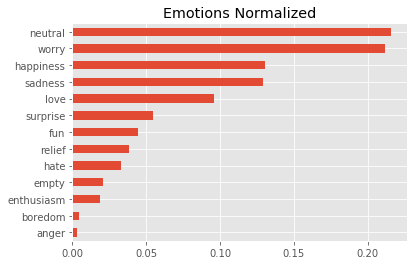

In [8]:
# Use ggplot style
plt.style.use('ggplot')

# Plot the value counts of emotions
df.sentiment.value_counts(normalize=True).sort_values(ascending=True).plot.barh()
plt.title('Emotions Normalized')

There is an emotion named "empty" in the data. I'd like to understand what it really means.

In [17]:
# Print head of the tweets with sentiment "empty"
df[df.sentiment == 'empty'].head()

,sentiment,author,content,polarity
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,neutral
44,empty,Aggie9,@creyes middle school and elem. High schools will remain open for those who need credits to graduate. Cali is broken,neutral
52,empty,Dreness023,@djmicdamn hey yu lil fucker i textd yu,neutral
141,empty,Gen22,@softtouchme just answered you- never learned how to write in French- just basic stuff-,neutral
180,empty,_SNO_,Have a headache I'm going to bed. Goodnight!,neutral


In [18]:
# Investigate empty
df[df.sentiment == 'empty'].sample(10)

,sentiment,author,content,polarity
13603,empty,MelissaP4484,Sooo the Children's Museum was closed for a fund raiser when we got there. annoying,neutral
15884,empty,andreayoas,@marykeegin I've been here since 3 and i'm here for 8 more hours tomorrow,neutral
19479,empty,MeganToscano,lotsa water. it's already dark out,neutral
25529,empty,Natss09,is making a cuppa coffeee,neutral
17414,empty,polover,"@cheerleaderlexy she interviewed us on books. I was gonna say something, but she was all &quot;Wait, I have something to say!&quot;",neutral
203,empty,SexyBeach,@DymeDiva23 Nite. Now I'm up n bored as opposed to almost sleep frm b 4,neutral
6677,empty,Fred1337,just get back home. the first exam was too long no time to finish it ...,neutral
10119,empty,Woaahhh,"gor i am soo bored, man i don't think i could get any more bored",neutral
29456,empty,alyssa_XD,@theDebbyRyan i left you some messages -alyssaBRUNO&lt;3,neutral
27848,empty,JenBarbie,Maybe going apartment shopping with Ashley?,neutral


In [22]:
# Number of observations with "empty" sentiment
df[df.sentiment == 'empty'].shape[0]

827

I's clear from the contents that "empty" is not the same as "neutral". There are various emotions among these tweets. Although the number of "empty" sentiments is not significant, the rows labeled `empty` may be dropped from the dataset.

In [23]:
# Drop rows  with sentiment "empty"
df = df[df.sentiment != 'empty']

## UPDATE FEATURE SELECTION

##### Author

In [9]:
# Print value counts
df.author.value_counts()

MissxMarisa        23
ChineseLearn       22
erkagarcia         19
MiDesfileNegro     19
lost_dog           18
tsarnick           17
KimmiMcfly         15
linnetwoods        15
Dogbook            14
twebbstack         14
cece_newnew        14
mrs_mcsupergirl    14
Quimo              14
divxdownloads      13
jesssicababesss    13
TraceyHewins       12
lesley007          12
lopezwilfred       12
Tittch             11
ComedyQueen        11
beingnobody        11
MandyPandy32       11
HanaStephenson     10
Samm_xo            10
sweetdreamer       10
violetbakes        10
Gemmaboyle         10
DawnofOURnight     10
keza34             10
BrandySanDiego     10
                   ..
magicboop           1
JustinJesselli      1
kimislolling        1
renatolz            1
mjrsuperstar        1
hairymaclary        1
Zombie_Plan         1
team140             1
SicknastyKaryn      1
Jeffdc5             1
sallismoney         1
allisonwannng       1
JESSABRAHAMS        1
slimcode            1
barnicles1

In [10]:
# Print the tweets of the author with highest number of tweets
df[df.author=='MissxMarisa']

,sentiment,author,content
260,surprise,MissxMarisa,"@freshypanda Im sorry I don't think I stick out, at least compared to what I used to look like."
333,hate,MissxMarisa,"@meganmansyn Hahahaha! It's not horrible, if others were singing with I'm sure it could work. I wish I could afford my own drum set"
1941,neutral,MissxMarisa,@tsarnick This year
2143,worry,MissxMarisa,@Zobi09 I'm concerned for that family
2298,neutral,MissxMarisa,"@tsarnick Yeah, that was my thumb last night. Sorry"
21267,love,MissxMarisa,"@shortyyyy Thank you I liked Joe's clothes' being ripped off and then Kevin screaming, &quot;Who are you!?!&quot; XD"
21560,surprise,MissxMarisa,"@Zanna85 Bill can take me to Fangtasia and hit this shot anytime! &quot;Roads, where we're going we don't need roads.&quot; LOVE that part!"
22574,happiness,MissxMarisa,@Zobi09 The cast of True Blood was there
22773,sadness,MissxMarisa,"@Zobi09 Haha yes I do it's hard work, too! I didn't get home until 3:00 AM, not like I sleep haha."
23154,neutral,MissxMarisa,@TheLonely California


##### Content

In [46]:
# Print the tweets of the authors who has multiple tweets in the dataset
df.content.value_counts()[df.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                     14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                      13
Happy Mothers Day                                                                                                                10
Happy Mother's Day!                                                                                                              10
happy mother's day                                                                                                                8
                                                                                                                                 ..
@andyclemmensen have you seen the game on the website?! awesomness!!! go on msn                                                   2
@thecompletes seen u a couple of times. Liked it                            

Some tweets are tweeted multiple times by different users. These may also be Retweets. There is not any information about RTs in the dataset.

In [50]:
# Tweets with same content
df[df.content=='I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9']

,tweet_id,sentiment,author,content
33496,1752619550,love,unifiedclock,I just received a mothers day card from my lov...
33693,1752674435,love,TheOrakill,I just received a mothers day card from my lov...
33874,1752725133,worry,charlesstinger,I just received a mothers day card from my lov...
34071,1752774341,love,jamesbankso,I just received a mothers day card from my lov...
34298,1752824798,love,sarahmarche,I just received a mothers day card from my lov...
34480,1752873814,love,xmanoxx,I just received a mothers day card from my lov...
34672,1752920582,love,oblongshmoblong,I just received a mothers day card from my lov...
34861,1752965288,love,lilpiggynose,I just received a mothers day card from my lov...
35051,1753009856,love,unitedstatesfre,I just received a mothers day card from my lov...
35232,1753052362,love,unifiedclock,I just received a mothers day card from my lov...


Interestingly, for the **same** tweet there are different sentiments in the target column. There may be other false labels in the dataset!

#### Polarity

In [26]:
df.polarity.value_counts()

positive    15299
negative    15236
neutral      8638
Name: polarity, dtype: int64

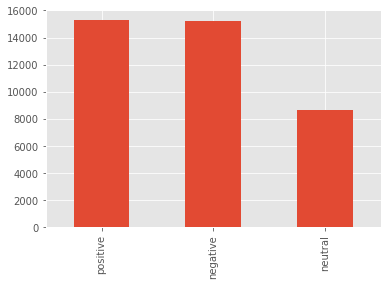

In [28]:
df.polarity.value_counts().plot.bar()

The frequencies of _sentiments_ appear to be more balanced when compared to that of the _emotions_.

In [15]:
# Create a sentiment dictionary to map EMOTIONS to POLARITY.
sentiment_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                  #'empty': 'neutral',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }
df['polarity'] = df.sentiment.map(sentiment_dict)

#### UPDATE FEATURE ENGINEERING

In [16]:
# Mentions by sentiment_new
df.groupby('polarity').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

polarity
negative    0.415070
positive    0.502124
neutral     0.523085
Name: content, dtype: float64

#### Mentions

In [13]:
# Average # of tweets that contain "mentions"
df.content.str.contains("@\w+").mean()

0.473925

Almost half of the tweets contain mentions. This does not seem normal. Let's see the distribution of emotions through mentioned tweets.

In [25]:
# Distribution of @mentions among emotions
df.groupby('sentiment').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

sentiment
boredom       0.273743
hate          0.375661
sadness       0.400000
anger         0.427273
worry         0.433266
relief        0.441678
empty         0.488513
happiness     0.491265
love          0.504425
enthusiasm    0.508564
neutral       0.526395
surprise      0.527663
fun           0.546734
Name: content, dtype: float64

It seems that people tend to mention more when they have a positive sentiment such as fun, whearas they tend to mention less when they express boredom or hate. Let's investigate this result further.

In [56]:
def count_mentions(text):
    '''Returns number of mentions in a string.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith("@")]
    
    # Return number of mentions
    return(len(mentions))

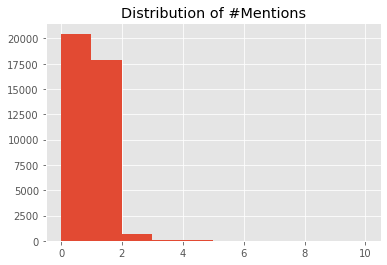

In [59]:
# Create a feature mention_count
df['mention_count'] = df['content'].apply(count_mentions)

# Plot the distribution
df['mention_count'].hist()
plt.title('Distribution of #Mentions')
plt.show()

In [61]:
df.groupby('sentiment').mention_count.mean().sort_values()

sentiment
boredom       0.290503
hate          0.397581
sadness       0.429235
anger         0.454545
worry         0.460456
relief        0.467890
happiness     0.522365
love          0.536960
enthusiasm    0.540184
surprise      0.561043
neutral       0.565026
fun           0.593468
Name: mention_count, dtype: float64

#### Hashtags

In [23]:
# Tweets that contain "hashtags"
df.content.str.contains("#\w+").mean()

0.01975

Only a small portion of tweets contain `#` (hashtag) s

In [54]:
def count_hashtags(text):
    '''Returns number of hashtags in a text.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith("#")]
    
    # Return number of hashtags
    return(len(hashtags))

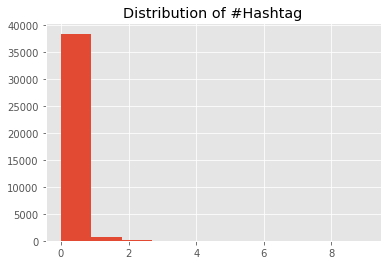

In [55]:
# Create a feature hashtag_count
df['hashtag_count'] = df['content'].apply(count_hashtags)

# Plot the distribution
df['hashtag_count'].hist()
plt.title('Distribution of #Hashtag')
plt.show()

#### Number of Characters

In [29]:
# Describe the length of the tweets in the contents column.
df.content.str.len().describe()

count    39173.000000
mean        73.591351
std         36.539053
min          1.000000
25%         43.000000
50%         69.000000
75%        103.000000
max        167.000000
Name: content, dtype: float64

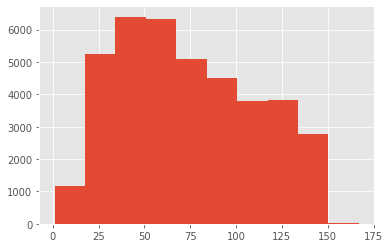

In [30]:
# Plot a histogram of the number of characters in tweets
df.content.str.len().hist()

Twitter has recently change the _character limit_ from 140 to 280. The dataset is possibly created before the change. However, some tweets contain more than 140 characters. I initially suspected that these are the ones with links. Yet the reason seems to be [Special Entities](http://www.htmlhelp.com/reference/html40/entities/special.html) such as `&quot;` or "`&amp;` which are rendered as -&quot;- and -&amp;- respectively. 

It is worth noting that most of the tweets contans less than 80 characters. It may be extremely hard to detect sentiments from such a text.

In [49]:
df[df.content.str.len()>140].sample(10)

,tweet_id,sentiment,author,content,polarity
6657,1961410317,sadness,loew01,"wow, I didn't realized that there is a limit to the &quot;more&quot; button. That sucks... I guess two days is the max to not sign in to twitter. !",negative
12498,1963588292,love,Chriztophe,"met a cute girl at mighty taco.I'm ordering(no cheese, no sour cream, etc)&amp; she's like&quot;it's ok, I'm Vegan too!&quot;(insert hot wink)too young",positive
36840,1753382411,love,love_yazmo,you know you love your mom when you stay up this late just to wrap her gifts (which look glorious) &amp; hand-make a card.. happy mothers day,positive
20857,1694126085,neutral,byhuy,@ducban &quot;nhi?p ?nh gia&quot; ? ?ï¿½y lï¿½ ch? cï¿½c b?n t? x?ng lï¿½ &quot;?am mï¿½ nhi?p ?nh&quot;. Cï¿½n ng??i thï¿½ch ch?p ?nh thï¿½ 99% dï¿½n s? r?i,neutral
26385,1695376835,neutral,geminimag,TalkingWithTami morning Ms. Tammie! Your fam looked adorable in Family Circle I bought it &amp; was like &quot;see honey? I talked to her&quot; LOL,neutral
12841,1963743820,neutral,ETown_Lesley,4am Hubby's alarm-song playing was &quot;Blame it on the Alcohol&quot; Of course I couldn't get back to sleep after cause thinking of Joe on cruise,neutral
11587,1963282166,happiness,RandyAmberTK,@mileycyrus they closed the voting...all u can vote for now is best movie Hope you win it! My 4 y/o Daughter lovesss 2 sing &quot;The Climb&quot;,positive
24773,1694928700,sadness,coffeegeek,Illy's note in the book: &quot;From one 'geek' to another - keep up the good work!&quot; sigh. He is missed - and he was great for espresso.,negative
30761,1751714638,neutral,BrandyLionWine,"@stuartdavis C'mon, we're talking about philos-ophy - the love of wisdom. I need a &quot;mat&quot; - a context to intersubjectively &quot;ground&quot; it.",neutral
32304,1752256387,neutral,TimeOutMom,@MyPreciousKid - i can do &quot;Nana&quot; or &quot;Nana Rocks&quot; for you in rhinestones &amp; do printed onesies for them &quot;my nana loves me&quot;,neutral


In [32]:
# Print tweets with less than 5 characters
df[df.content.str.len()<5]

,sentiment,author,content,polarity
15028,neutral,KimberlyBarrena,0,neutral
29869,neutral,JaBrezzy96,0,neutral
39415,neutral,superbot5000,0,neutral


There are tweets which contains only a single character. These should be removed. 

In [33]:
# Drop unnecessary rows
df.drop(df[df.content.str.len()<5].index, inplace=True)

#### UPDATE FEATURE ENGINEERING

In [34]:
df.shape

(39170, 4)

In [35]:
# Print tweets with less than 10 characters
df[df.content.str.len()<10].sample(5)

,sentiment,author,content,polarity
37457,neutral,aaaaaaanna,bbq party,neutral
30338,happiness,pillow11,is cute,positive
32001,worry,s_beautiful,is on air,negative
20095,neutral,slappinmybass,seepin'.,neutral
5087,neutral,imamulki,I hate PC,neutral


Some tweets consist of only mentions. We may need to drop them as well.

In [36]:
# Detect the tweets that contains only mentions
df[df.content.str.replace("@\w+", "").str.len()<2].head()

,sentiment,author,content,polarity
659,neutral,mallycakes,@Joshuah_Pearson,neutral
664,neutral,joelmagic,@emlevins,neutral
3181,neutral,Samantha_Mayy,@Clumsyflic,neutral
4865,neutral,edduleroy,@philleasfogg,neutral
4933,neutral,rickoshea,@WillKnott,neutral


In [59]:
# # Drop the tweets that contains only mentions
# df.drop(df[df.content.str.replace("@\w+", "").str.len()<2].index, inplace=True)

#### UPDATE FEATURE ENGINEERING

In [60]:
df.shape

(39920, 5)

#### Detect Language

##### TextBlob

In [37]:
# from textblob import TextBlob
# # b = TextBlob("merhaba")
# # b.detect_language()

# from time import sleep

# def detect_lan(tweet):

#     sleep(.01)
#     try:
#         return TextBlob(tweet).detect_language()
#     except:
#         return np.nan

# df['language'] = df.content.apply(detect_lan)

In [38]:
# df['language'] = df.content.apply(lambda tweet: TextBlob(tweet).detect_language())

##### langdetect

In [39]:
# from langdetect import detect
# df['language'] = df.content.apply(lambda tweet: detect(tweet))

# # Print detected languages
# df['language'].value_counts()

In [40]:
# df[df['language']!='en'].sample(10)

It seems that most of the tweets that are detected as non-English have mistakes in the words, such as missing a letter or having extra characters, or they have mentions. Let's see the results w/o mentions.

In [115]:
# def detect_language(tweet):
#     try:
#         return detect(tweet)
#     except:
#         return "unknown"

In [63]:
# # Detect language of tweets without mentions
# df['language'] = df.content.str.replace("@\w+", "").apply(detect_language)

In [41]:
# df['language'].value_counts()

The number of "en"s is decreased. We may need to perform tokenization and preprocessing in order to get legit results from text detection.

Whether these tweets are really non-English or incorrect written sentences, they may be dropped for the quality of the analysis.

> NEEDS FURTHER INVESTIGATION

##### FastText (by Facebook)

FastText performed better than `TextBlob` and `langdetect` for the language detection. Therefore, I'll use it for final detection.

In [49]:
#!pip install fasttext

# Model link: https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

In [50]:
# import fasttext

language_model = fasttext.load_model('data/lid.176.bin')

def detect_fasttext(tweet):
    prediction = language_model.predict(tweet)
    label = prediction[0][0].split("__label__")[1]
    return label

df['language'] = df.content.apply(detect_fasttext)

In [51]:
df.language.value_counts()

en     38339
de       180
es       147
ja       100
fr        81
pt        42
it        30
nl        29
zh        25
hu        17
fi        15
tl        12
ca        12
id        11
no        10
ru        10
ro        10
pl         9
eo         8
et         8
el         7
sv         7
cs         6
tr         5
ia         4
fy         3
gl         3
cy         3
ms         3
ar         2
da         2
sr         2
uk         2
lb         2
si         2
la         2
nn         2
az         1
kw         1
ta         1
uz         1
sl         1
nds        1
ur         1
eu         1
th         1
qu         1
ko         1
hy         1
vi         1
km         1
hr         1
he         1
sh         1
sw         1
Name: language, dtype: int64

Accuracy is clearly higher with FastText language identifier.

In [53]:
df[df['language'] != 'en'].sample(10)

,sentiment,author,content,polarity,language
25988,happiness,missbrandii,Good mornin twiggas.,positive,eo
17167,worry,sofiaramirezU,En el salon.. Que caliente el blower ouch,negative,es
27141,neutral,miiquiita_jonas,En el colectivo jodiendo con las chicas i promisse upload photos then.,neutral,es
11293,neutral,JackieDanger,@AMcCallon stop itt!,neutral,hu
39497,love,littlehotmess35,HAPPY MOTHER'S DAYYY!,positive,zh
23479,neutral,jecaaa,just made som situpps,neutral,no
12200,sadness,TaraHussey,@ZeenaBoBeena im sorry. I fail.,negative,de
902,worry,movewithme,@keytar @badtwin BUT THEY ARE EXPENSIVE.,negative,zh
34394,happiness,justanaussiefan,IT'S MOTHER'S DAY,positive,ja
39910,enthusiasm,miloocyrus,CAN'T SLEEP TONIGHT . Oh see ya! Bye,positive,zh


#### Hyperlinks

In [40]:
# Number/ratio of tweets with hyperlinks
df.content.str.lower().str.contains("http").agg([np.sum, np.mean])

sum     1811.00000
mean       0.04528
Name: content, dtype: float64

In [39]:
df[df.content.str.lower().str.contains("http")].sentiment.value_counts(normalize=True)

neutral       0.298730
worry         0.144119
happiness     0.141911
love          0.122032
sadness       0.079514
fun           0.059083
surprise      0.055218
relief        0.028713
empty         0.027057
hate          0.020983
enthusiasm    0.019326
anger         0.002209
boredom       0.001104
Name: sentiment, dtype: float64

In [108]:
df[~df.content.str.contains("http")].sentiment.value_counts(normalize=True)

worry         0.214692
neutral       0.211968
sadness       0.131491
happiness     0.129684
love          0.094828
surprise      0.054655
fun           0.043708
relief        0.038602
hate          0.033652
empty         0.020348
enthusiasm    0.018960
boredom       0.004635
anger         0.002776
Name: sentiment, dtype: float64

It seems that sharing a link may have some, though not significant relationship with the sentiment. Lets keep this as a feature, or in the text???

In [109]:
# Create a new column "has_link"
df['has_link'] = df.content.str.contains("http")*1